In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Initialise parameters:
num_of_agents = 1000 # number of agents
Timesteps = 10 # timesteps
R = 0.3 # confidence bound


In [31]:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]

In [32]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [33]:
# Running model

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)

opinions_over_time

array([[8.30828231e-05, 3.70682843e-04, 5.63269419e-04, ...,
        9.98531882e-01, 9.99627032e-01, 9.99832411e-01],
       [1.45737995e-01, 1.45737995e-01, 1.45737995e-01, ...,
        8.50597913e-01, 8.51116617e-01, 8.51634981e-01],
       [2.70858642e-01, 2.70858642e-01, 2.70858642e-01, ...,
        7.26870915e-01, 7.26870915e-01, 7.26870915e-01],
       ...,
       [4.87871044e-01, 4.87871044e-01, 4.87871044e-01, ...,
        4.87871044e-01, 4.87871044e-01, 4.87871044e-01],
       [4.87871044e-01, 4.87871044e-01, 4.87871044e-01, ...,
        4.87871044e-01, 4.87871044e-01, 4.87871044e-01],
       [4.87871044e-01, 4.87871044e-01, 4.87871044e-01, ...,
        4.87871044e-01, 4.87871044e-01, 4.87871044e-01]], shape=(10, 1000))

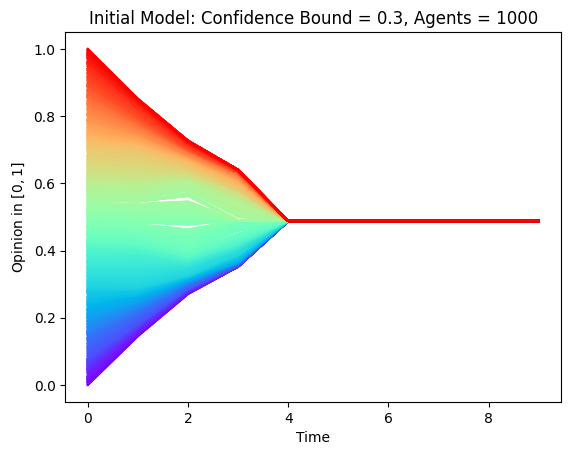

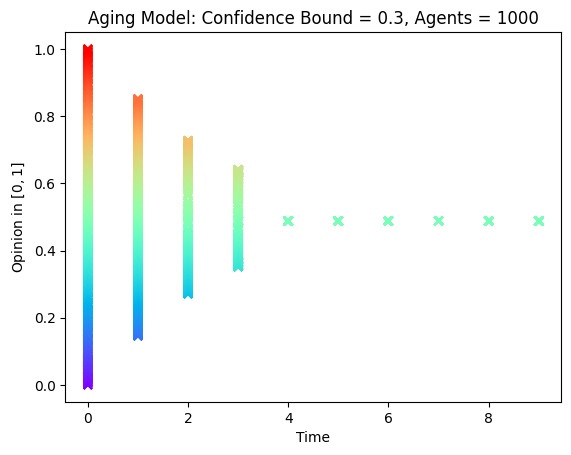

In [34]:
colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i],color=colours[i])
plt.title(f'Initial Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()


colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))
plt.scatter(np.array([range(Timesteps)]*num_of_agents).T, opinions_over_time, c=opinions_over_time, cmap='rainbow', marker='x')
plt.title(f'Aging Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()